In [1]:
"""import our data"""

import numpy as np
from data import get_data_from_csv, get_labels_and_data_1st_column
import matplotlib.pyplot as plt
import math

# DATA FROM HERE: https://pjreddie.com/projects/mnist-in-csv/
file_test = '../data/MNIST/mnist_test.csv'
file_train = '../data/MNIST/mnist_train.csv'

data_test, m_test, n_test = get_data_from_csv(file_test)
Y_test, X_test = get_labels_and_data_1st_column(data_test)

data_train, m_train, n_train = get_data_from_csv(file_train)
Y_train, X_train = get_labels_and_data_1st_column(data_train)

assert n_test == n_train
n = n_test
m = m_test + m_train



In [2]:
"""making sure that our Y_test/Y_train are actually labels"""

assert Y_test.max() == 9
assert Y_train.max() == 9
assert X_test[0].max() != 9
assert X_train[0].max() != 9

# display(Y_test[:100])
# display(Y_train[:100])
# display(X_test[500][:100])
# display(X_train[500][:100])

In [3]:
# normalize pixel data to values between 0 and 1. Max = 255, min = 0, thus divide by 255
X_train = X_train / 255.
X_test = X_test / 255.

In [4]:
def loss(Y, Y_hat):
    return 1/2 * np.sum((Y - Y_hat)**2)

def softmax(s):
    return np.exp(s) / sum(np.exp(s))

def softmax_deriv(s):
    sm = softmax(s)
    return sm.dot(1-sm)

LR = 1
Y = np.array([0,0,1,0])
A1 = np.array([-.5, 2, -1, 2])
W1 = W2 = np.random.randn(4, 4)
b1 = b2 = np.random.randn(4)
epochs = 100

print()
print("GOING WITH softmax_deriv for real")
for epoch in range(epochs):
    # print()
    # print(f"{epoch = }")
    # print(f"{Y = }")
    Z2 = np.dot(W2,A1) + b2

    Y_hat = softmax(Z2)
    # print(f"{Y_hat = }")
    Loss  =  loss(Y,Y_hat)
    if not epoch%(epochs//2):
        print(f"\n{W2 = }\n{b2 = }\n{Loss = }")

    DY_hat = -Y + Y_hat
    # print(f"{DY_hat = }")
    dY_hatdZ2  =  softmax_deriv(Z2)
    # print(f"{dY_hatdZ2 = }")
    DZ2  =  DY_hat * dY_hatdZ2
    # print(f"{DZ2 = }")
    dZ2dW2 = A1
    dZ2db2 = 1
    DW2 = DZ2 * A1
    Db2 = DZ2

    W2 = W2 - LR*DW2
    b2 = b2 - LR*Db2

print()
print("GOING WITH softmax_deriv is just 1")
for epoch in range(epochs):
    # print()
    # print(f"{epoch = }")
    # print(f"{Y = }")
    Z2 = np.dot(W1,A1) + b1

    Y_hat = softmax(Z2)
    # print(f"{Y_hat = }")
    Loss  =  loss(Y,Y_hat)
    if not epoch%(epochs//2):
        print(f"\n{W1 = }\n{b1 = }\n{Loss = }")

    DY_hat = -Y + Y_hat
    # print(f"{DY_hat = }")
    dY_hatdZ2  =  1
    # print(f"{dY_hatdZ2 = }")
    DZ2  =  DY_hat * dY_hatdZ2
    # print(f"{DZ2 = }")
    dZ2dW1 = A1
    dZ2db1 = 1
    DW1 = DZ2 * A1
    Db1 = DZ2

    W1 = W1 - LR*DW1
    b1 = b1 - LR*Db1


GOING WITH softmax_deriv for real

W2 = array([[-0.49401717, -0.39344673,  0.16643332,  0.62938038],
       [-1.39457955, -0.62359613, -0.00250598,  0.69085349],
       [-1.19560725, -0.77126029, -0.35043784, -0.41737817],
       [-0.49866737, -0.24884278, -0.32906893, -1.06952687]])
b2 = array([ 0.18809544, -0.68993784, -0.33827194,  0.574414  ])
Loss = 0.6713816540396009

W2 = array([[ 0.50437682, -3.37573078, -3.82487244, -0.37737112],
       [-0.39618556, -3.60588018, -3.99381174, -0.31589801],
       [-0.19721326, -3.75354434, -4.3417436 , -1.42412967],
       [ 0.49972662, -3.23112683, -4.32037469, -2.07627837]])
b2 = array([-1.80869255, -2.18107987,  3.65303382,  0.07103825])
Loss = 0.003209430747444754

GOING WITH softmax_deriv is just 1

W1 = array([[-0.49401717, -0.39344673,  0.16643332,  0.62938038],
       [-1.39457955, -0.62359613, -0.00250598,  0.69085349],
       [-1.19560725, -0.77126029, -0.35043784, -0.41737817],
       [-0.49866737, -0.24884278, -0.32906893, -1.0695

In [5]:
"""
FORWARD PASS
Give X
A0 = X :: [784,m]
Z1[10,m] = W1[10,784] * X[784,m] + b1[10]
A1[10,m] = RelU(Z1[10,m])
Z2[10,m] = W2[10,10] * A1[10,m] + b2[10]
Y_hat[10,m] = softmax(A2[10,m])
Receive Y_hat
"""


def initialize_w_b():
    W1 = np.random.randn(10, 784)
    b1 = np.random.randn(10,1)
    W2 = np.random.randn(10,10)
    b1 = np.random.randn(10,1)
    return W1, b1, W2, b1




In [6]:
W1, b1, W2, b2 = initialize_w_b()



batch_size = 8
m = batch_size
# X = X_test[:,:m]
# Y = Y_test[:m]


# Y = one_hot_encode(Y)

Y = Y_train
X = X_train
Z1, A1, Z2, Y_hat = forward_pass(X[:,1, None], W1, b1, W2, b2)
print(np.sum(Y_hat,axis=1))

print(Y_hat.shape)
print(sum(Y_hat))

# DW1, Db1, DW2, Db2 = backwards_propagation(Y_hat, Y, X, Z2, A1, Z1, W1, b1, W2, b2, m)


NameError: name 'forward_pass' is not defined

In [102]:
class model():
    def __init__(self, X_dataset,Y_dataset):
        self.X = X_dataset
        self.Y = Y_dataset
        self.W1 = np.random.rand(10, 784)
        self.b1 = np.random.rand(10,1)
        self.W2 = np.random.rand(10,10)
        self.b2 = np.random.rand(10,1)
    
    def update(self,X_dataset, Y_dataset):
        self.X = X_dataset
        self.Y = Y_dataset

    def get_predictions(self,Y_hat):
        predictions = np.argmax(Y_hat,0)
        return predictions

    
    def accuracy(self, Y_hat, Y):
        
        predictions = self.get_predictions(Y_hat)
        return np.sum(predictions == Y) / Y.size
    
    def gradient_descent(self, iterations, learning_rate=0.01):
        for iteration in range(iterations):
            Z1, A1, Z2, Y_hat = self.forward_pass(X=self.X)
            DW1, Db1, DW2, Db2 = self.backwards_propagation(Y_hat,self.Y, Z2, A1, Z1, m)
            print(f"{DW1.shape} | {Db1.shape} | {DW2.shape} | {Db2.shape}")
            print(f"before, {self.b1=} {Db1=}")
            self.update_params( DW1, Db1, DW2, Db2, 0.01)
            print("after, ", self.b1)

            accuracy = self.accuracy(Y_hat, self.Y)
            print(accuracy)
    
    def ReLU(self, n: float) -> float:
        """rectified linear unit activation function"""
        return np.maximum(n, 0)

    def ReLU_deriv(self, n: float) -> int:
        """"derivative of ReLU"""
        return n > 0

    def softmax(self, array: np.array) -> np.array:
        # collapses 1 dimension of array
        return np.exp(array) / np.sum(np.exp(array), axis=0)

    def forward_pass(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        Y_hat = softmax(Z2) 
        return Z1, A1, Z2, Y_hat

    def one_hot_encode(self, Y: np.array, classes = 10):
        # first instantiate 0's which should be an array of len(Y) max(Y) 
        one_hot = np.zeros((Y.size,classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T


    def backwards_propagation(self, Y_hat, Y, X, Z2, A1, Z1, m):
        """


        
        n = number of possible encodings # in general, n can change through a network,
            but we're assuming that n is used for encodings and also layer size
        m = number of inputs, batch size

        x = number of datapoints per input
        X[x,m] = Input - m examples of x data points
        Y[n,m] = one-hot encoding of results: e.g. [[0,0,0,1,0,0], ... ] (with m encodings)
        W1[n,x] = weights applied to X
        b1[n,1] = biases applied to values going into Z1_n
        Z1[n,m] = pre-activation function values = W1[n,x] dot X[x,m] + b1[n,1]
        A1[n,m] = ReLU(Z1[n,m])
        W2[n,n] = weights applied to A1
        b2[n,1] = biases applied to values going into Z2_n
        Z2[n,m] = pre-softmax function values = W2[n,n] dot A1[n,m] + b2[n,1]
        Y_hat[n,m] = the estimate of Y = softmax(Z2[n,m])
        
        definition: Loss = L[m] = [L_0, L_1, ..., L_m] # possiblly L[1,m]
            = 1/2*np.sum((Y - Y_hat)**2)
            in other words for each row m:
                L_m = 1/2*sum[j from 0 to n] of (Y[j,m] - Y_hat[j,m])**2 
                = sum[j from 0 to n] of 1/2*Y[j,m]**2 - Y[j,m]*Y_hat[j,m] + 1/2*Y_hat[j,m]**2
    (1)     L = np.sum(1/2*Y**2 - Y*Y_hat + 1/2*Y_hat**2)
        We set this loss specifically so that the derivative works out nicely

        To minimize L, we want to see how L will change with respect to the variable
        that we can control, namely Y_hat.
        We can calculate how changing one of the values in Y_hat effects Y.
        DY_hat[j,m] = dL/dY_hat[j,m] = -Y[j,m] + Y_hat[j,m] 
        This generalizes because dL/dY_hat should be an array of shape Y.shape, with each
        value j corresponding to how much Y_hat[j] effects L given some specific input (m).
        NOTE: dL/dY_hat will show how to change Y_hat to *increase* L by 1 unit 
        (this will be true for all derivatives we calculate).
        dL/dY_hat = -Y + Y_hat (calculated derivative from (1))
        call this DY_hat for simplicity

        REMINDER: Y_hat[n,m] = softmax(Z2[n,m])
        NOTE: dSoftmax(X)/dX = softmax(X) dot (1-softmax(X)), but we will use 1 instead FOR SOME REASON???
        dY_hat/dZ2 = 1                    ####### not: softmax(Z2)*(1-softmax(Z2))
        thus, by chain rule:
        DZ2[n,m] = dL/dZ2 = dL/dY_hat * dY_hat/dZ2 = DY_hat * 1

        REMINDER: Z2[n,m] = W2[n,n] dot A1[n,m] + b2[n,1]
        dZ2/dW2[m,n] = A1[n,m].T[m,n] / m
        dZ2/db2[m,1] = np.sum(Z2[n,m])[m] / m
        Now, were ready to calculate DW2, Db2
        DW2[n,n] = dL/dW2 = dL/dZ2 * dZ2/dW2 = DZ2[n,m] dot A1.T[m,n] / m
        Db2[n,1] = dL/db2 = dL/dZ2 * dZ2/db2 = DZ2[n,m] dot np.sum(Z2[n,m])[m,1] / m 

        
        dZ2/dA1 = W2[n,n]
        DA1[n,n] = dL/dA1 = dL/dZ2 * dZ2/dA1 = DZ2[n,m] * W2[n,n]
        DZ1[x,x] = dL/dA1 * dA1/dZ1 = DA1[n,n] * ReLU_deriv(Z1)

        REMINDER: Z1[n,m] = W1[n,x] dot X[x,m] + b1[n,1]
        dZ1/dW1[m,n] = X[n,m].T[m,n] / m
        dZ1/db1[m,1] = np.sum(Z1[n,m])[m] / m
        Now, were ready to calculate DW1, Db1
        DW1[x,n] = dL/dW1 = dL/dZ1 * dZ1/dW1 = DZ1[x,x] dot X.T[x,n] / m
        Db1[n,1] = dL/db1 = dL/dZ2 * dZ1/db1 = DZ2[n,m] dot np.sum(Z2[n,m])[m,1] / m 
        
        """
        
        m = Y.size
        one_hot_Y = self.one_hot_encode(Y)
        print(f"{Y.shape}")
        DY_hat = -one_hot_Y + Y_hat
        DZ2 = DY_hat * 1
        
        print()
        DW2 = np.dot(DZ2,A1.T) / m
        Db2 = np.dot(DZ2, np.sum(Z2)) / m

        DA1 = np.dot(self.W2.T, DZ2)
        DZ1 = DA1 * self.ReLU_deriv(Z1)

        DW1 = np.dot(DZ1, X.T) / m
        Db1 = np.dot(DZ2, np.sum(Z2)) / m

        return DW1, Db1, DW2, Db2

        Y = self.one_hot_encode(Y)

        DZ2 = -Y + Y_hat
        
        DW2 = np.dot(DZ2,A1.T) / m
        
        Db2 = np.sum(DZ2) / m

        DZ1 = np.dot(self.W2.T, DZ2) * self.ReLU_deriv(Z1)

        DW1 = np.dot(DZ1, self.X.T) / m
        Db1 =  np.sum(DZ1) / m
        print(f"{DW1=} {Db1=} {DW2=} {Db2=}  ")
        return DW1, Db1, DW2, Db2


    def update_params(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 = self.W1 - learning_rate*dW1
        self.b1 = self.b1 - learning_rate*db1
        self.W2 = self.W2 - learning_rate*dW2
        self.b2 = self.b2 - learning_rate*db2


    def make_prediction(self,X):
        print(X.shape)
        _,_,_, Y_hat = self.forward_pass(X)
        predictions = self.get_predictions(Y_hat)
        return predictions

    def test_predict(self,sample_index):
        current_image = self.X[:, sample_index, None]
        sample = Y[sample_index]
        current_image = current_image.reshape((28,28))*255

        plt.gray()
        plt.imshow(current_image, interpolation="nearest")
        plt.show()
        sample = Y[sample_index]
        X_sample = X[sample_index]
        prediction = self.make_prediction(self.X[:,sample_index, None])
        print(f"{sample=} , prediction = {prediction}. Correct = {sample == prediction}")



            


In [103]:
from configparser import Interpolation

# creating a object
# im = Image.open()
  
# im.show()
m = 8
mod = model(X_train, Y_train)
Z1, A1, Z2, Y_hat = mod.forward_pass(mod.X)
# # mod.gradient_descent(100)
# print(f"{Z1} {A1} {Z2} {Y_hat} {sum(Y_hat)}")
DW1, Db1, DW2, Db2 = mod.backwards_propagation(Y_hat, mod.Y,mod.X, Z2, A1, Z1,m)
print(f"{DW1=}, {Db1=}, {DW2=}, {Db2=}")
# mod.update_params(DW1, Db1, DW2, Db2, 0.01)
# mod.gradient_descent(15)


(59999,)
DW1=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), Db1=array([[ 9.99426103e-53,  3.49697815e-64,  3.20240583e-38, ...,
         1.30311838e-80,  9.36307625e-66,  2.84531355e-38],
       [ 9.74556380e-36,  3.06038248e-44,  2.25135576e-25, ...,
         4.69592274e-55,  6.45760871e-43,  2.72260965e-25],
       [ 1.46297002e-27, -2.67590448e+03, -2.67590448e+03, ...,
         2.04796738e-42,  1.66335292e-35,  3.99143604e-18],
       ...,
       [ 2.67590448e+03,  2.67590448e+03,  2.67590448e+03, ...,
         2.67590448e+03,  2.67590448e+03, -4.17939285e-09],
       [ 9.66293094e-22,  1.21576192e-27,  3.49494799e-14, ...,
         1.89258528e-35,  6.93492268e-27,  1.71656449e-17],
       [-2.67590448e+03,  4.02433436e-15,  1.47958163e-08, ...,
         

/tmp/ipykernel_62751/3371678565.py:5: RuntimeWarning: overflow encountered in exp
  return np.exp(s) / sum(np.exp(s))
/tmp/ipykernel_62751/3371678565.py:5: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(s) / sum(np.exp(s))


In [104]:
print(mod.W1.shape)

(10, 784)


In [ ]:
predictions = mod.make_prediction(X_train[:,12, None])


AttributeError: 'model' object has no attribute 'make_predictions'

In [ ]:
X_train[:,12, None].shape

(784, 1)

In [ ]:
predictions.shape

(59999,)

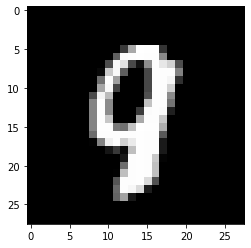

AttributeError: 'model' object has no attribute 'make_prediction'

In [ ]:
mod.test_predict(12)


In [ ]:
Z1, A1, Z2, Y_hat = forward_pass(X_train[:,12, None], mod.W1, mod.b1, mod.W2, mod.b2)


In [ ]:
Y_hat.shape

(10, 59999)